# <a id='toc1_'></a>[COVID-19 Prediction](#toc0_)

Sam Celarek  
Data Science   
scelarek@gmail.com  

June 4th, 2023


**Table of contents**<a id='toc0_'></a>    
- [COVID-19 Prediction](#toc1_)    
- [1. Introduction](#toc2_)    
  - [1.1. Key Questions](#toc2_1_)    
- [2. Setup and Data Collection](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[1. Introduction](#toc0_)

In this project, we will perform a set of analyses on the relationship between different variables and the mosquito number, as well as the probability of finding West Nile Virus (WNV) at any particular time and location. 


## <a id='toc2_1_'></a>[1.1. Key Questions](#toc0_)

## <a id='toc2_1_'></a>[1.2. Data Sources and Methods](#toc0_)


# <a id='toc3_'></a>[2. Setup and Data Collection](#toc0_)

We will be utilizing the cleaned mosquito tracking data from the city of Chicago, Illinois, spanning from 2008 to 2019 provided [here](link_to_dataset). This section will include the necessary libraries and modules for the analysis, as well as the data preparation steps.


In [636]:
from capstone_functions import *

In [637]:
import covsirphy as cs

print(f"Covsirphy version: {cs.__version__}")


Covsirphy version: 3.0.0


In [638]:
# initialize styling params
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly, add_changepoints_to_plot

cs.config.logger(level=2)

Country of Interest: United States of America

In [639]:
country_ISO3 = "USA"
location_key = "US"
# 


### OWID Dataset

<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 306301 to 307587
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    1287 non-null   object 
 1   continent                                   1287 non-null   object 
 2   location                                    1287 non-null   object 
 3   date                                        1287 non-null   object 
 4   total_cases                                 1270 non-null   float64
 5   new_cases                                   1287 non-null   float64
 6   new_cases_smoothed                          1282 non-null   float64
 7   total_deaths                                1230 non-null   float64
 8   new_deaths                                  1286 non-null   float64
 9   new_deaths_smoothed                         1281 non-null   float64
 10  total_case

<AxesSubplot: >

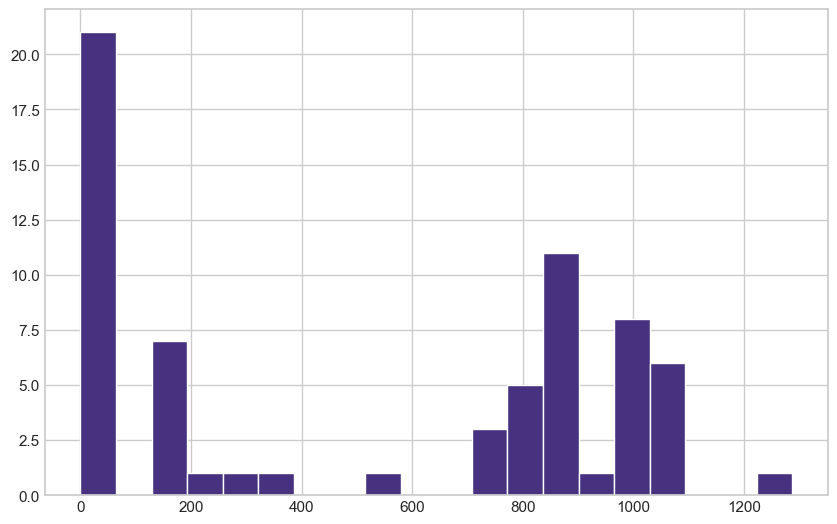

In [640]:
owid_cov = pd.read_parquet('../Data/owid-covid-data.parquet', engine='pyarrow')

owid_cov.info()

owid_cov.nunique().hist(bins=20)


In [641]:
owid_cov.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
306301,USA,North America,United States,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
306302,USA,North America,United States,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
306303,USA,North America,United States,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0,-2640.0,-4.2,-4.2,-7.858499
306304,USA,North America,United States,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
306305,USA,North America,United States,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


In [642]:
owid_cov = owid_cov.loc[:, owid_cov.nunique() > 1]
owid_cov['date'] = pd.to_datetime(owid_cov['date'])

owid_cov.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
306301,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
306302,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
306303,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-2640.0,-4.2,-4.2,-7.858499
306304,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
306305,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [643]:
owid_cov.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
306301,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
306302,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
306303,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-2640.0,-4.2,-4.2,-7.858499
306304,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
306305,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


## CovSIRPhy Dataset Loading

The CovSIRPhy dataset is a collection of COVID-19 data from around the world, including the number of confirmed cases, recovered cases, and deaths. The data is collected from the following sources:


In [644]:
eng = cs.DataEngineer()
eng.download(country=None, databases=["covid19dh", "owid", "wpp", "japan"])

# Set Country of interest and Join Column for Other Dataframes

print("\n".join(eng.citations()))

Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https: //doi.org/10.1038/s41597-020-00688-8
Hirokazu Takaya (2020-2023), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan
United Nations, Department of Economic and Social Affairs, Population Division (2022). World Population Prospects 2022, Online Edition.


In [645]:
# Convert Date Column to Datetime, Resampling for only the dates in question, and Filling of Missing Values with Forward Fill and 0
eng.clean(kinds=['resample', 'fillna', 'convert_date'], date_range=('2020-01-15', '2023-07-01'))
eng.transform()

# Day to Day Differences
eng.diff(column="Confirmed", suffix="_Daily_Diff", freq="D")
eng.diff(column="Fatal", suffix="_Daily_Diff", freq="D")
eng.diff(column="Recovered", suffix="_Daily_Diff", freq="D")
eng.diff(column="Susceptible", suffix="_Daily_Diff", freq="D")
eng.diff(column="Tests", suffix="_Daily_Diff", freq="D")

# Addition
eng.add(columns=["Fatal", "Recovered"], new="Total_Removed")

# Division and Ratios
eng.div(numerator="Confirmed", denominator="Tests", new="Confirmed_per_Test")
eng.div(numerator="Fatal", denominator="Confirmed", new="Fatal_per_Confirmed")
eng.div(numerator="Recovered", denominator="Confirmed", new="Recovered_per_Confirmed")
eng.div(numerator="Fatal", denominator="Total_Removed", new="Fatal_to_Total_Removed")

eng.all().info()
eng.all().tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298288 entries, 0 to 298287
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ISO3                                 298288 non-null  category      
 1   Province                             298288 non-null  category      
 2   City                                 298288 non-null  category      
 3   Date                                 298288 non-null  datetime64[ns]
 4   Cancel_events                        298288 non-null  Float64       
 5   Confirmed                            298288 non-null  Float64       
 6   Confirmed_Daily_Diff                 298288 non-null  Float64       
 7   Confirmed_per_Test                   298288 non-null  Float64       
 8   Contact_tracing                      298288 non-null  Float64       
 9   Country                              298288 non-null  object        
 

,ISO3,Province,City,Date,Cancel_events,Confirmed,Confirmed_Daily_Diff,Confirmed_per_Test,Contact_tracing,Country,Fatal,Fatal_Daily_Diff,Fatal_per_Confirmed,Fatal_to_Total_Removed,Gatherings_restrictions,Infected,Information_campaigns,Internal_movement_restrictions,International_movement_restrictions,Population,Product,Recovered,Recovered_Daily_Diff,Recovered_per_Confirmed,School_closing,Stay_home_restrictions,Stringency_index,Susceptible,Susceptible_Daily_Diff,Testing_policy,Tests,Tests_Daily_Diff,Total_Removed,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing
298283,ZWE,-,-,2023-06-27,1.0,264276.0,0.0,0.111045,1.0,Zimbabwe,5671.0,0.0,0.021459,0.06396,3.0,175611.0,2.0,1.0,1.0,14439018.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V",82994.0,0.0,0.314043,1.0,2.0,53.7,14174742.0,0.0,3.0,2379907.0,0.0,88665,1.0,4751270.0,6437808.0,12222754.0,1033676.0,1.0
298284,ZWE,-,-,2023-06-28,1.0,264276.0,0.0,0.111045,1.0,Zimbabwe,5671.0,0.0,0.021459,0.06396,3.0,175611.0,2.0,1.0,1.0,14439018.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V",82994.0,0.0,0.314043,1.0,2.0,53.7,14174742.0,0.0,3.0,2379907.0,0.0,88665,1.0,4751270.0,6437808.0,12222754.0,1033676.0,1.0
298285,ZWE,-,-,2023-06-29,1.0,264276.0,0.0,0.111045,1.0,Zimbabwe,5671.0,0.0,0.021459,0.06396,3.0,175611.0,2.0,1.0,1.0,14439018.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V",82994.0,0.0,0.314043,1.0,2.0,53.7,14174742.0,0.0,3.0,2379907.0,0.0,88665,1.0,4751270.0,6437808.0,12222754.0,1033676.0,1.0
298286,ZWE,-,-,2023-06-30,1.0,264276.0,0.0,0.111045,1.0,Zimbabwe,5671.0,0.0,0.021459,0.06396,3.0,175611.0,2.0,1.0,1.0,14439018.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V",82994.0,0.0,0.314043,1.0,2.0,53.7,14174742.0,0.0,3.0,2379907.0,0.0,88665,1.0,4751270.0,6437808.0,12222754.0,1033676.0,1.0
298287,ZWE,-,-,2023-07-01,1.0,264276.0,0.0,0.111045,1.0,Zimbabwe,5671.0,0.0,0.021459,0.06396,3.0,175611.0,2.0,1.0,1.0,16665409.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V",82994.0,0.0,0.314043,1.0,2.0,53.7,16401133.0,2226391.0,3.0,2379907.0,0.0,88665,1.0,4751270.0,6437808.0,12222754.0,1033676.0,1.0


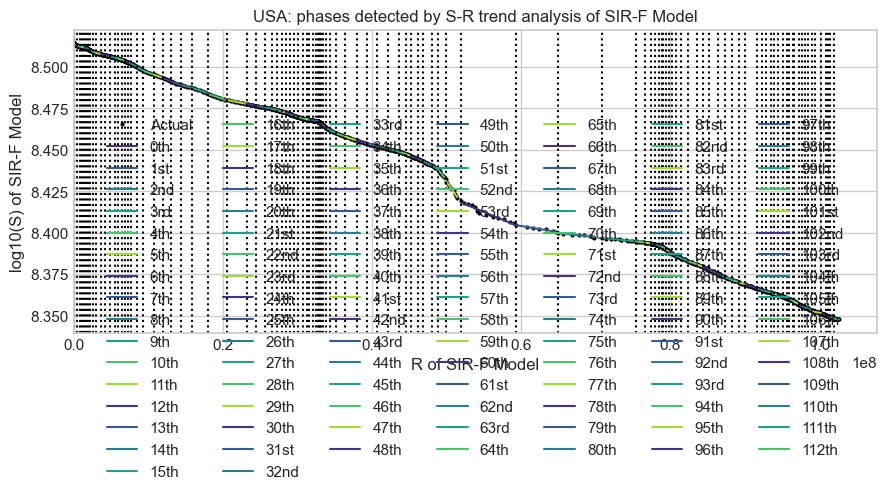

  0%|          | 0/113 [00:00<?, ?it/s]

In [646]:
# Create subset of data for the country of interest and the dates of interest
# Complement does two things here: forces always increasing cumulative values, estimates recovered cases using value of estimated recovery period

actual_df, _, _ = eng.subset(geo=country_ISO3, start_date='2020-02-15', end_date='2023-04-01', complement=True)

# Create a SIRF Model from actual df
dyn_act = cs.Dynamics.from_data(model=cs.SIRFModel, data=actual_df, name=country_ISO3)
dyn_act.register()

# # Breakdown of the SIRF Model Parameters and points of change
dyn_act.segment()

# Show summary
check = dyn_act.summary().diff()['End'].value_counts().sort_index()

# Calculate tau value and Disease Parameters from Actual SIRF Data
dyn_act.estimate()

# Interpolate Disease Parameters
track_df = dyn_act.track()



Tau value [min]: 60


,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day]
Rt,1.000000,-0.056891,0.784276,0.637964,-0.529605,-0.055930,-0.082777,-0.220153,0.950956
theta,-0.056891,1.000000,-0.124260,-0.364404,-0.349528,0.999991,0.006770,0.614695,0.143726
kappa,0.784276,-0.124260,1.000000,0.458785,-0.291249,-0.123651,-0.377460,-0.177280,0.765968
rho,0.637964,-0.364404,0.458785,1.000000,0.099479,-0.364080,0.156534,-0.606709,0.464736
sigma,-0.529605,-0.349528,-0.291249,0.099479,1.000000,-0.350313,0.039683,-0.311994,-0.575089
alpha1 [-],-0.055930,0.999991,-0.123651,-0.364080,-0.350313,1.000000,0.006619,0.614793,0.144644
1/alpha2 [day],-0.082777,0.006770,-0.377460,0.156534,0.039683,0.006619,1.000000,-0.055141,-0.145435
1/beta [day],-0.220153,0.614695,-0.177280,-0.606709,-0.311994,0.614793,-0.055141,1.000000,-0.005889
1/gamma [day],0.950956,0.143726,0.765968,0.464736,-0.575089,0.144644,-0.145435,-0.005889,1.000000


Rt                 90
theta             113
kappa             113
rho               113
sigma             113
alpha1 [-]         26
1/alpha2 [day]    109
1/beta [day]       30
1/gamma [day]      41
dtype: int64

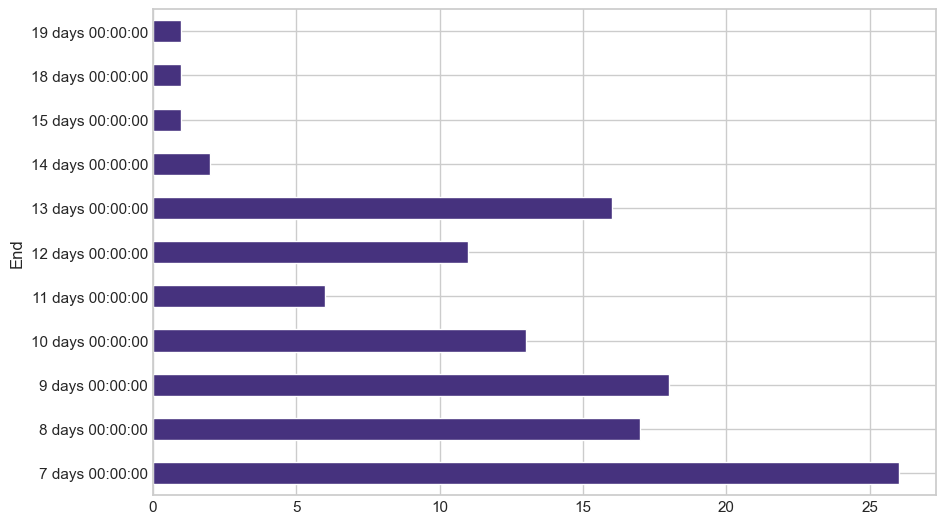

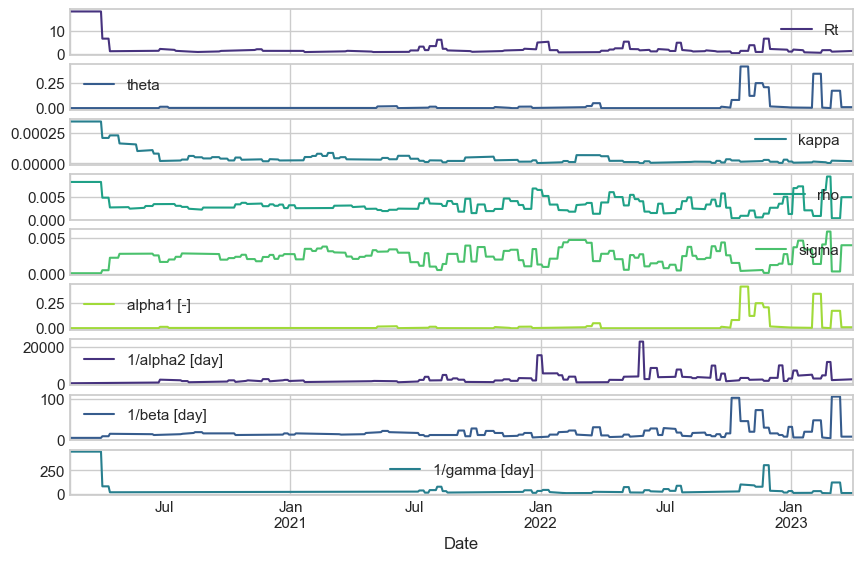

In [647]:
check.plot.barh()

print(f"Tau value [min]: {dyn_act.tau or 'un-set'}")

track_df.plot(subplots=True)

display(track_df.corr().style.background_gradient())

track_df.nunique()


In [757]:
# merge two datasets together on date
disease_df = pd.merge(actual_df, track_df, how='left', on='Date')

disease_df.info()
display(disease_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1142 entries, 2020-02-15 to 2023-04-01
Data columns (total 45 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Cancel_events                                               1142 non-null   Float64
 1   Confirmed_Daily_Diff                                        1142 non-null   Float64
 2   Confirmed_per_Test                                          1142 non-null   Float64
 3   Contact_tracing                                             1142 non-null   Float64
 4   Fatal_Daily_Diff                                            1142 non-null   Float64
 5   Fatal_per_Confirmed                                         1142 non-null   Float64
 6   Fatal_to_Total_Removed                                      1142 non-null   Float64
 7   Gatherings_restrictions                                     1142 non-

,Cancel_events,Confirmed_Daily_Diff,Confirmed_per_Test,Contact_tracing,Fatal_Daily_Diff,Fatal_per_Confirmed,Fatal_to_Total_Removed,Gatherings_restrictions,Infected,Information_campaigns,Internal_movement_restrictions,International_movement_restrictions,Population,Recovered_Daily_Diff,Recovered_per_Confirmed,School_closing,Stay_home_restrictions,Stringency_index,Susceptible,Susceptible_Daily_Diff,Testing_policy,Tests,Tests_Daily_Diff,Total_Removed,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing,Confirmed,Fatal,Recovered,Country_United States,Product_0,"Product_Johnson&Johnson, Moderna, Novavax, Pfizer/BioNTech",Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day]
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-15,0.0,0.0,inf,1.0,0.0,0.0,NaN,0.0,15,0.0,0.0,3.0,326687501.0,0.0,0.0,0.0,0.0,8.33,326687486.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,15,0,0,1,1,0,18.63,0.000706,0.000347,0.008188,0.000093,0.001,120,5,450
2020-02-16,0.0,0.0,inf,1.0,0.0,0.0,NaN,0.0,15,0.0,0.0,3.0,326687501.0,0.0,0.0,0.0,0.0,8.33,326687486.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,15,0,0,1,1,0,18.63,0.000706,0.000347,0.008188,0.000093,0.001,120,5,450
2020-02-17,0.0,10.0,inf,1.0,0.0,0.0,NaN,0.0,25,0.0,0.0,3.0,326687501.0,0.0,0.0,0.0,0.0,8.33,326687476.0,-10.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,25,0,0,1,1,0,18.63,0.000706,0.000347,0.008188,0.000093,0.001,120,5,450
2020-02-18,0.0,0.0,inf,1.0,0.0,0.0,NaN,0.0,25,0.0,0.0,3.0,326687501.0,0.0,0.0,0.0,0.0,8.33,326687476.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,25,0,0,1,1,0,18.63,0.000706,0.000347,0.008188,0.000093,0.001,120,5,450
2020-02-19,0.0,0.0,inf,1.0,0.0,0.0,NaN,0.0,25,0.0,0.0,3.0,326687501.0,0.0,0.0,0.0,0.0,8.33,326687476.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,25,0,0,1,1,0,18.63,0.000706,0.000347,0.008188,0.000093,0.001,120,5,450


## Cleaning

In [758]:
# Convert all column names to lowercase and replace spaces with underscores
disease_df.columns = [i.lower().replace(' ', '_') for i in disease_df.columns]

# Rename the index as 'date'
disease_df = disease_df.rename_axis('date')


In [759]:

# Display the count of NaN values for each column in the DataFrame where count is greater than 0
display('Amount of NaNs in ', disease_df.apply(lambda x: (x != x).sum()).loc[disease_df.apply(lambda x: (x != x).sum()) > 0])

# Display the sum of 'fatal', 'total_removed', 'fatal_to_total_removed' columns where 'fatal_to_total_removed' column has NaN
display(disease_df[disease_df.applymap(lambda x: (x != x)).fatal_to_total_removed][['fatal', 'total_removed', 'fatal_to_total_removed']].sum())

# Replace all NaN values with 0 in the DataFrame
disease_df = disease_df.applymap(lambda x: 0 if (x != x) else x)


'Amount of NaNs in '

fatal_to_total_removed    14
dtype: int32

fatal                     0.0
total_removed             0.0
fatal_to_total_removed    NaN
dtype: float64

In [760]:

# Display the count of inf values for each column in the DataFrame where count is greater than 0
display('Amount of Infs in ', disease_df.apply(lambda x: (x == np.inf).sum()).loc[disease_df.apply(lambda x: (x == np.inf).sum()) > 0])

# Display first five rows of 'confirmed', 'tests', 'confirmed_per_test' columns where 'confirmed_per_test' column has inf
display(disease_df[disease_df.applymap(lambda x: (x == np.inf)).confirmed_per_test][['confirmed', 'tests', 'confirmed_per_test']].head())

# Display the count of rows where 'confirmed' column values are greater than 'tests' column values
display(disease_df.loc[disease_df.confirmed > disease_df.tests, 'tests'].count())


'Amount of Infs in '

confirmed_per_test    15
dtype: int64

,confirmed,tests,confirmed_per_test
date,,,
2020-02-15,15,0.0,inf
2020-02-16,15,0.0,inf
2020-02-17,25,0.0,inf
2020-02-18,25,0.0,inf
2020-02-19,25,0.0,inf


15

In [761]:

# For rows where 'confirmed' column values are greater than 'tests' column values, set 'tests' column values equal to 'confirmed' column values
disease_df.loc[disease_df.confirmed > disease_df.tests, 'tests'] = disease_df.confirmed

# Display the count of rows where 'confirmed' column values are greater than 'tests' column values
display(disease_df.loc[disease_df.confirmed > disease_df.tests, 'tests'].count())


0

In [762]:
# Display first five rows of 'confirmed', 'tests', 'confirmed_per_test' columns where 'confirmed_per_test' column has inf
display(disease_df[disease_df.applymap(lambda x: (x == np.inf)).confirmed_per_test][['confirmed', 'tests', 'confirmed_per_test']].head())

# Replace the column 'confirmed_per_test' with the new ratio of 'confirmed' to 'tests'
disease_df['confirmed_per_test'] = disease_df['confirmed_per_test'].replace(np.inf, np.nan).fillna(method='backfill')

# Display first five rows of 'confirmed', 'tests', 'confirmed_per_test' columns where 'confirmed_per_test' column has inf
display(disease_df[disease_df.apply(lambda x: (x != x)).confirmed_per_test][['confirmed', 'tests', 'confirmed_per_test']].head())


,confirmed,tests,confirmed_per_test
date,,,
2020-02-15,15,15.0,inf
2020-02-16,15,15.0,inf
2020-02-17,25,25.0,inf
2020-02-18,25,25.0,inf
2020-02-19,25,25.0,inf


,confirmed,tests,confirmed_per_test
date,,,


In [763]:
display(disease_df.loc[:, disease_df.nunique() == 1].nunique())

disease_df = disease_df.loc[:, disease_df.nunique() > 1]

display(disease_df.nunique())


contact_tracing            1
population                 1
recovered_daily_diff       1
recovered_per_confirmed    1
country_united_states      1
dtype: int64

cancel_events                                                    3
confirmed_daily_diff                                          1120
confirmed_per_test                                            1118
fatal_daily_diff                                               842
fatal_per_confirmed                                           1120
fatal_to_total_removed                                           2
gatherings_restrictions                                          5
infected                                                      1136
information_campaigns                                            2
internal_movement_restrictions                                   4
international_movement_restrictions                              2
school_closing                                                   3
stay_home_restrictions                                           4
stringency_index                                                31
susceptible                                                   

## Google Datasets Loading and Cleaning

In [764]:
folder_holder = "C://Users/Samsickle/Documents/Universal_Code_Bank/BrainStation_Capstone/Data/"


def clean_df(df, location_key):
    # Filter the dataframe based on location key and date.
    df = df.query('location_key == @location_key and date >= "2020-02-03"')
    
    # Rename the columns to lowercase and replace spaces with underscores.
    df.columns = [i.lower().replace(' ', '_') for i in df.columns]

    # Convert the 'date' column to datetime format and set it as index.
    df = df.set_index('date')
    df = df.drop(columns=['location_key'])
    df.index = pd.to_datetime(df.index)

    # Print the info and head of the DataFrame.
    df.info()
    display(df.head())

    return df


In [765]:
# # Load the mobility data from the CSV file
mobility_df = pd.read_csv(f'{folder_holder}mobility.csv')


In [766]:

# Clean the mobility data using the 'clean_df' function
mobility_df = clean_df(mobility_df, location_key)



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941 entries, 2020-02-15 to 2022-09-12
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   mobility_retail_and_recreation  941 non-null    float64
 1   mobility_grocery_and_pharmacy   941 non-null    float64
 2   mobility_parks                  941 non-null    float64
 3   mobility_transit_stations       941 non-null    float64
 4   mobility_workplaces             941 non-null    float64
 5   mobility_residential            941 non-null    float64
dtypes: float64(6)
memory usage: 51.5 KB


,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential
date,,,,,,
2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [767]:
mobility_df.isna().sum()

mobility_retail_and_recreation    0
mobility_grocery_and_pharmacy     0
mobility_parks                    0
mobility_transit_stations         0
mobility_workplaces               0
mobility_residential              0
dtype: int64

In [768]:
display(mobility_df.describe().T.style.background_gradient(cmap='coolwarm'))


,count,mean,std,min,25%,50%,75%,max
mobility_retail_and_recreation,941.000000,-12.635494,10.878340,-82.000000,-17.000000,-10.000000,-6.000000,14.000000
mobility_grocery_and_pharmacy,941.000000,-2.530287,7.504352,-61.000000,-6.000000,-2.000000,1.000000,36.000000
mobility_parks,941.000000,20.588735,27.710046,-38.000000,-3.000000,23.000000,42.000000,127.000000
mobility_transit_stations,941.000000,-25.818278,11.040926,-67.000000,-32.000000,-24.000000,-20.000000,7.000000
mobility_workplaces,941.000000,-25.922423,12.984579,-84.000000,-33.000000,-28.000000,-15.000000,5.000000
mobility_residential,941.000000,6.900106,4.881643,-2.000000,4.000000,6.000000,10.000000,27.000000


In [769]:
# # Load the weather data from the CSV file
weather_df = pd.read_csv(f'{folder_holder}weather.csv')


In [770]:

# Clean the weather data using the 'clean_df' function and fill any NA/NaN values with 0
weather_df = clean_df(weather_df, location_key).fillna(0)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 955 entries, 2020-02-03 to 2022-09-14
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   average_temperature_celsius  955 non-null    float64
 1   minimum_temperature_celsius  955 non-null    float64
 2   maximum_temperature_celsius  955 non-null    float64
 3   rainfall_mm                  955 non-null    float64
 4   snowfall_mm                  73 non-null     float64
 5   dew_point                    955 non-null    float64
 6   relative_humidity            955 non-null    float64
dtypes: float64(7)
memory usage: 59.7 KB


,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
date,,,,,,,
2020-02-03,2.580247,-0.919753,12.555556,0.000000,NaN,-2.259259,70.649217
2020-02-04,-2.604938,-4.635802,0.524691,0.000000,NaN,-10.413580,55.083671
2020-02-05,-3.796296,-8.172840,1.123457,0.000000,NaN,-10.302469,60.749625
2020-02-06,-3.253086,-9.617284,6.487654,0.028222,NaN,-8.796296,65.709282
2020-02-07,0.333333,-4.598765,5.203704,0.056444,NaN,-4.703704,69.069757


In [771]:
display(weather_df.describe().T.style.background_gradient(cmap='coolwarm'))


,count,mean,std,min,25%,50%,75%,max
average_temperature_celsius,955.000000,13.053442,10.946355,-24.183333,4.692592,13.494444,22.913889,31.572222
minimum_temperature_celsius,955.000000,6.433242,10.659971,-29.494444,-1.922222,6.583333,16.192901,24.138889
maximum_temperature_celsius,955.000000,21.323390,11.300698,-18.794444,13.158333,23.000000,31.077778,40.050000
rainfall_mm,955.000000,1.524455,4.422059,0.000000,0.000000,0.000000,0.762000,68.410667
snowfall_mm,955.000000,8.091651,34.031695,0.000000,0.000000,0.000000,0.000000,239.606667
dew_point,955.000000,4.971532,10.614199,-28.788889,-3.546297,5.016667,14.966667,21.850000
relative_humidity,955.000000,59.824230,13.513215,23.829070,49.853179,59.482454,69.241626,93.145563


In [772]:

# # Load the government response data from the CSV file
gov_response_df = pd.read_csv(f'{folder_holder}oxford-government-response.csv')

# Clean the government response data using the 'clean_df' function
gov_response_df = clean_df(gov_response_df, location_key)

display(gov_response_df.agg(['min', 'mean', 'max']).T.style.background_gradient(cmap='coolwarm'))


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 886 entries, 2020-02-03 to 2022-07-07
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   school_closing                      886 non-null    float64
 1   workplace_closing                   886 non-null    float64
 2   cancel_public_events                886 non-null    float64
 3   restrictions_on_gatherings          886 non-null    float64
 4   public_transport_closing            886 non-null    float64
 5   stay_at_home_requirements           886 non-null    float64
 6   restrictions_on_internal_movement   886 non-null    float64
 7   international_travel_controls       886 non-null    float64
 8   income_support                      886 non-null    float64
 9   debt_relief                         886 non-null    float64
 10  fiscal_measures                     503 non-null    float64
 11  international_support     

,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
date,,,,,,,,,,,,,,,,,,,,
2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.56
2020-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.56
2020-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.56
2020-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.56
2020-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,100000000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.56


,min,mean,max
school_closing,0.000000,2.292325,3.000000
workplace_closing,0.000000,1.971783,3.000000
cancel_public_events,0.000000,1.613995,2.000000
restrictions_on_gatherings,0.000000,3.196388,4.000000
public_transport_closing,0.000000,0.951467,1.000000
stay_at_home_requirements,0.000000,1.120767,2.000000
restrictions_on_internal_movement,0.000000,1.521445,2.000000
international_travel_controls,2.000000,3.241535,4.000000
income_support,0.000000,1.055305,2.000000
debt_relief,0.000000,0.625282,1.000000


In [773]:

display(gov_response_df.agg(['min', 'max']).T.style.background_gradient(cmap='coolwarm'))

orig_1 = gov_response_df.agg(['min', 'max']).copy()
                        
gov_response_df = gov_response_df.applymap(lambda x: np.abs(x))

orig_1 - gov_response_df.agg(['min', 'max'])

display(gov_response_df.agg(['min', 'max']).T.style.background_gradient(cmap='coolwarm'))



,min,max
school_closing,0.000000,3.000000
workplace_closing,0.000000,3.000000
cancel_public_events,0.000000,2.000000
restrictions_on_gatherings,0.000000,4.000000
public_transport_closing,0.000000,1.000000
stay_at_home_requirements,0.000000,2.000000
restrictions_on_internal_movement,0.000000,2.000000
international_travel_controls,2.000000,4.000000
income_support,0.000000,2.000000
debt_relief,0.000000,1.000000


,min,max
school_closing,0.000000,3.000000
workplace_closing,0.000000,3.000000
cancel_public_events,0.000000,2.000000
restrictions_on_gatherings,0.000000,4.000000
public_transport_closing,0.000000,1.000000
stay_at_home_requirements,0.000000,2.000000
restrictions_on_internal_movement,0.000000,2.000000
international_travel_controls,2.000000,4.000000
income_support,0.000000,2.000000
debt_relief,0.000000,1.000000


### Final Merging of Datasets

In [774]:
# Identify columns common to 'disease_df' and 'gov_response_df'.
list_of_same_columns = disease_df.columns[disease_df.columns.isin(gov_response_df.columns)]
print(list_of_same_columns)

# Remove the common columns from 'gov_response_df'.
gov_response_df = gov_response_df.drop(columns = list_of_same_columns)

list_of_same_columns = disease_df.columns[disease_df.columns.isin(gov_response_df.columns)]
print(list_of_same_columns)


Index(['school_closing', 'stringency_index', 'testing_policy',
       'workplace_closing'],
      dtype='object')
Index([], dtype='object')


In [780]:
# Create a list of dataframes to be merged
time_series_dfs = [disease_df, mobility_df, gov_response_df, weather_df, owid_cov] #hospitalizations_df


# Use functools.reduce to merge all dataframes in the list on 'date' column, with 'left' join method
master_df = reduce(lambda a, b: pd.merge(a, b, how='left', right_on='date', left_on='date'), time_series_dfs)

# Display summary and first few rows of the master dataframe
master_df.info()
master_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Columns: 115 entries, date to excess_mortality_cumulative_per_million
dtypes: datetime64[ns](1), float64(104), int64(10)
memory usage: 1.0 MB


,date,cancel_events,confirmed_daily_diff,confirmed_per_test,fatal_daily_diff,fatal_per_confirmed,fatal_to_total_removed,gatherings_restrictions,infected,information_campaigns,internal_movement_restrictions,international_movement_restrictions,school_closing,stay_home_restrictions,stringency_index_x,susceptible,susceptible_daily_diff,testing_policy,tests,tests_daily_diff,total_removed,transport_closing,vaccinated_full,vaccinated_once,vaccinations,...,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index_y,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-02-15,0.0,0.0,0.252874,0.0,0.0,0.0,0.0,15,0.0,0.0,3.0,0.0,0.0,8.33,326687486.0,0.0,1.0,15.0,0.0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,NaN,NaN,NaN
1,2020-02-16,0.0,0.0,0.252874,0.0,0.0,0.0,0.0,15,0.0,0.0,3.0,0.0,0.0,8.33,326687486.0,0.0,1.0,15.0,0.0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,-13024.399,-3.03,-2.36,-38.769783
2,2020-02-17,0.0,10.0,0.252874,0.0,0.0,0.0,0.0,25,0.0,0.0,3.0,0.0,0.0,8.33,326687476.0,-10.0,1.0,25.0,0.0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,NaN,NaN,NaN
3,2020-02-18,0.0,0.0,0.252874,0.0,0.0,0.0,0.0,25,0.0,0.0,3.0,0.0,0.0,8.33,326687476.0,0.0,1.0,25.0,0.0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,NaN,NaN,NaN
4,2020-02-19,0.0,0.0,0.252874,0.0,0.0,0.0,0.0,25,0.0,0.0,3.0,0.0,0.0,8.33,326687476.0,0.0,1.0,25.0,0.0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,NaN,NaN,NaN


In [781]:
# Initialize an empty dataframe to hold the column names
df_columns = pd.DataFrame()

# Iterate over each dataframe in the list and add their column names to df_columns
for i, df in enumerate(time_series_dfs):
    df_name = [x for x in globals() if globals()[x] is df][0]
    df_columns[df_name] = pd.Series(df.columns)

df_columns.fillna('', inplace=True)

# Display the dataframe
def highlight_string(data, string="your_string", color='yellow'):
    attr = f'background-color: {color}'
    return np.where(data.str.contains(string), attr, '')



In [782]:


drop_list = ['cancel_public_events', 'restrictions_on_gatherings', 'restrictions_on_internal_movement', 
            'international_travel_controls', 'public_information_campaigns', 'stay_at_home_requirements',
            'public_transport_closing', 
            
            'total_boosters_per_hundred',  'vaccinations_boosters',
            'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',	'people_vaccinated_per_hundred',	
            'people_fully_vaccinated_per_hundred',	'new_vaccinations_smoothed_per_million',	
            'new_people_vaccinated_smoothed',	'new_people_vaccinated_smoothed_per_hundred',
                                
            'vaccinated_full', 'vaccinated_once', 'vaccinations',
            
            'product_0', 'product_johnson&johnson,_moderna,_novavax,_pfizer/biontech', 
            'fiscal_measures', 'international_support', 'investment_in_vaccines', 'emergency_investment_in_healthcare',
            
            'tests', 'tests_daily_diff', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 
            'new_tests_smoothed_per_thousand', 'new_cases_smoothed', 'total_cases', 'new_cases', 'new_deaths', 'new_deaths_smoothed',
            
            'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million',
            'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_hosp_admissions_per_million', 'weekly_hosp_admissions',
            
            'total_deaths', 'new_deaths', 'new_deaths_smoothed'
            ]

checking = 'boos'

df_columns.style.apply(highlight_string, string=checking, color='yellow')



,disease_df,mobility_df,gov_response_df,weather_df,owid_cov
0,cancel_events,mobility_retail_and_recreation,cancel_public_events,average_temperature_celsius,date
1,confirmed_daily_diff,mobility_grocery_and_pharmacy,restrictions_on_gatherings,minimum_temperature_celsius,total_cases
2,confirmed_per_test,mobility_parks,public_transport_closing,maximum_temperature_celsius,new_cases
3,fatal_daily_diff,mobility_transit_stations,stay_at_home_requirements,rainfall_mm,new_cases_smoothed
4,fatal_per_confirmed,mobility_workplaces,restrictions_on_internal_movement,snowfall_mm,total_deaths
5,fatal_to_total_removed,mobility_residential,international_travel_controls,dew_point,new_deaths
6,gatherings_restrictions,,income_support,relative_humidity,new_deaths_smoothed
7,infected,,debt_relief,,total_cases_per_million
8,information_campaigns,,fiscal_measures,,new_cases_per_million
9,internal_movement_restrictions,,international_support,,new_cases_smoothed_per_million


In [783]:
master_df[master_df['date'].between('2020-12-02', '2021-03-12')].filter(regex=f'{checking}|date').fillna(method='ffill').fillna(0).T.duplicated()


date                          False
vaccinations_boosters         False
total_boosters                 True
total_boosters_per_hundred    False
dtype: bool

In [784]:

checking_series = pd.Series(df_columns.stack().sort_values()).str.extract(f'(.*{checking}.*)').dropna().rename({'0': 'Column Names'})
checking_data = pd.Series(master_df.filter(regex=f'{checking}').isna().sum(), name='Null Count')

checking_data

vaccinations_boosters           0
total_boosters                567
total_boosters_per_hundred    567
Name: Null Count, dtype: int64

In [785]:
# """
# Cell generated by Data Wrangler.
# """
def clean_data(master_df):
    master_df = master_df.drop(columns=drop_list)
    return master_df

master_df = clean_data(master_df)
master_df.head()



,date,cancel_events,confirmed_daily_diff,confirmed_per_test,fatal_daily_diff,fatal_per_confirmed,fatal_to_total_removed,gatherings_restrictions,infected,information_campaigns,internal_movement_restrictions,international_movement_restrictions,school_closing,stay_home_restrictions,stringency_index_x,susceptible,susceptible_daily_diff,testing_policy,total_removed,transport_closing,workplace_closing,confirmed,fatal,recovered,rt,...,vaccination_policy,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity,reproduction_rate,icu_patients,hosp_patients,total_tests,new_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index_y,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-02-15,0.0,0.0,0.252874,0.0,0.0,0.0,0.0,15,0.0,0.0,3.0,0.0,0.0,8.33,326687486.0,0.0,1.0,0,0.0,0.0,15,0,0,18.63,...,0.0,0.956790,-7.543210,10.753086,0.000000,0.0,-6.882716,55.902618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,NaN,NaN,NaN
1,2020-02-16,0.0,0.0,0.252874,0.0,0.0,0.0,0.0,15,0.0,0.0,3.0,0.0,0.0,8.33,326687486.0,0.0,1.0,0,0.0,0.0,15,0,0,18.63,...,0.0,3.919753,-3.561728,12.549383,0.000000,0.0,-5.919753,49.045643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,-13024.399,-3.03,-2.36,-38.769783
2,2020-02-17,0.0,10.0,0.252874,0.0,0.0,0.0,0.0,25,0.0,0.0,3.0,0.0,0.0,8.33,326687476.0,-10.0,1.0,0,0.0,0.0,25,0,0,18.63,...,0.0,6.197531,1.401235,13.111111,0.056444,0.0,-0.481481,62.382674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,NaN,NaN,NaN
3,2020-02-18,0.0,0.0,0.252874,0.0,0.0,0.0,0.0,25,0.0,0.0,3.0,0.0,0.0,8.33,326687476.0,0.0,1.0,0,0.0,0.0,25,0,0,18.63,...,0.0,0.592593,-5.197531,7.456790,0.000000,0.0,-5.759259,62.698408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,NaN,NaN,NaN
4,2020-02-19,0.0,0.0,0.252874,0.0,0.0,0.0,0.0,25,0.0,0.0,3.0,0.0,0.0,8.33,326687476.0,0.0,1.0,0,0.0,0.0,25,0,0,18.63,...,0.0,-2.753086,-6.777778,4.913580,0.000000,0.0,-7.364198,71.309848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,NaN,NaN,NaN


In [ ]:
# 9-13 no more mobility data
# 'income_support', 'debt_relief', 'contract_tracing', 'excess_mortality_cumulative_per_million'

# 2022-07-07 no more: 'facial_coverings', 'vaccination_policy'
# 2022-06-19 no more: total_test data, new_tests, positive_rate data, tests_per_case
# ffill needed on: 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_absolute'
# 2022-09-02 no more: 'total_boosters'
# 2022-09-[13-15] no more: mobility data or weather data respectively
# 2022-12-31 00:00:00 no more: stringency index data

In [ ]:
master_df.to_parquet('../Data/master_df.parquet', compression='snappy')
master_df = pd.read_parquet('../Data/master_df.parquet')

dfSummary(master_df, is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,date[datetime64[ns]],"Min: 2020-02-15Max: 2023-04-01Duration: 1,141 days",1142 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAK4AAABRCAYAAABLyJ0iAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACNUlEQVR4nO3YPW/aUBiG4feYBB0+YouPwsbSsZslFpZuHftjs3YHqTNDlkwsCAkZI9ygWMRdujbBdhL0iPta8eNzhlsecEVRGKAmuPQFgCoIF5Ju3nrAOdcys2aNM56LoniqsYegj+7m1XCdc63BYPAzDMNe1dN3u93BOffLzI4VXxGY2csFtte+r7P1/X7/RxRFnYp72+/3iXPu/n/xvvXFbYZh2JvNZk9RFJUOb71e3y0Wi++TyWTYaDRK70+n022WZV+73e5jEAT5Z22vfV/37DzPvZl9m06nv4fD4b7sPk1TP5/Pe9vttmlmlcI1M7Moio6j0ehP2QskSdLy3rfjOD6Ox+Ok7H61WvWWy+WXOI4fyu7rbK99/05nt733eZVu/mm99uNZ4dbV6XQqh191X2d77fv3Ovsj8a8CJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJBEuJN2c81Capr7Kyw+Hgzczy7LMbzab9mfuL3m2+v7Sdz+nt783zTf7F4RI0AAAAABJRU5ErkJggg=="">",0(0.0%)
2,cancel_events[float64],1. -2.02. 0.03. -1.0,629 (55.1%)341 (29.9%)172 (15.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAK4AAABICAYAAABvEc5xAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABrElEQVR4nO3cwWnjUBiF0V+DCJONhDG4GBcxxU4R6sYYa5GEbJTFFDDECL1c6ZwKns0Htozf7ZZlKUjTVdVrVb20PsiBfS7L8t76EGn68/n8ZxiGU+uDHNU8z/eu6/6K93v6YRhO1+v1fRzHj9aHOZrH4/F7mqbT7XZ7qSrhfkNfVTWO48flcnlrfZiDem19gES/Wh8AniFcIgmXSMIlknCJJFwiCZdIwiWScIkkXCIJl0jCJZJwiSRcIgmXSH3Vvz80tz7IEXnfn9fP83yfpulU/tDcxDzP96r6bH2ONC5Ltuey5BM619NJ5OGMSHv8quCj9wB2t6tgp+AYdrWrYKfgOPa4q+BnvQPwcEYk4RJJuEQSLpGESyThEkm4RBIukYRLJOESSbhEEi6RhEsk4RJJuETa1a7CXl4H/7e7XQU7BcfgsiSR7CoQycMZkbb8quAjnNVstqtg74A1bbKrYO+AtW25q7CLn9v4GTycEUm4RBIukYRLJOESSbhEEi6RhEsk4RJJuEQSLpGESyThEkm4RBIukTbZVbB3wNo221Wwd8CaXJYkkl0FIn0B9b6jUHQRXZcAAAAASUVORK5CYII="">",0(0.0%)
3,confirmed_daily_diff[float64],Mean (sd) : 90989.5 (128510.1)min < med < max:-23999.0 < 54684.5 < 1433977.0IQR (CV) : 92002.8 (0.7),"1,120 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKYAAABDCAYAAAAWAX5GAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB5klEQVR4nO3dwWoiQRSF4VNtlDY63YigOzfZZ+HSh5iHzXb2vsXsRZDYYk0cpdN5gTCmKsgc8P/W3lLkx0YouKHrOgFuiv/9AYDPPFx7QQhhKGmQef6567q3zFncsX+GGUIYTqfTn1VVTXIOPxwOryGEF+JEqmu/mIOqqiar1eqtrutTysFN05Tr9Xqy2+0GkggTSa4+yiWpruvTbDb7k3H+MGMG4M8PPBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLBEmLH1pl2Sutm37kqoQQs44K6Xv2M3CjDH2L5fL82Kx6PV6vaTNvRIrpe/dzcI8n88PZVk+LpfL03w+f02ZZaU0bvool6TRaMRKaSTjzw8sESYsESYsESYsESYsESYsESYsESYsESYsESYsESYsESYs3fwSR65v3uUsJL1nvjX3QA18KcymacrUg4/HYylJMcZyu90+psxuNpsfuXc527btxxifxuPx76IoLimzkrTf748hhF+Sku+QItnfrus+/Z4/APpad1U2NENgAAAAAElFTkSuQmCC"">",0(0.0%)
4,confirmed_per_test[float64],Mean (sd) : 0.1 (0.0)min < med < max:0.0 < 0.1 < 0.3IQR (CV) : 0.0 (3.2),"1,118 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKYAAABDCAYAAAAWAX5GAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoUlEQVR4nO3cP0/bQByH8d81kJ6T6I4QChsrA1IGJJa8gI682L6EDgwdESsTGwKiRKRJ45h0KVJVlT++EPG183z2sy30OMi+87nlcmmAmk8ffQHA/2yt8+DOuczMmonD58vlcvqe14PqWFuYzrms1+udhRC6KePH4/HQOfeNODfTOn8xmyGE7mAwmMYYZ2UGjkYjf35+3r27u2uaGWFuoLX+KzczizHO9vf3fyYMzd79YlAZPPxAEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFCEmFC0to/301VFMW2mQXnXMpwdvGoOMkwJ5PJdp7n/cPDw0aj0Si1WYIZu3jUgWSY8/l8y3vfOjk5mR0cHAzLjGUXj3qQDPNJu91mF48NxcMPJBEmJBEmJBEmJBEmJBEmJBEmJBEmJBEmJBEmJBEmJBEmJBEmJEmvLkrFIuPqq12YLDKuh9qFySLjeqhdmE9YZFxtPPxAEmFCEmFCEmFCEmFCEmFC0quvi5xzmZk1E4

# ***DATA LEAKAGE ALERT***

In [ ]:
master_df.columns

Index(['date', 'cancel_events', 'confirmed_daily_diff', 'confirmed_per_test',
       'fatal_daily_diff', 'fatal_per_confirmed', 'fatal_to_total_removed',
       'gatherings_restrictions', 'infected', 'information_campaigns',
       ...
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index_y',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'],
      dtype='object', length=109)

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.ensemble import ExtraTreesRegressor

# # Initialize the imputer
# imputer = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=100, random_state=42))

# # Fit the imputer on the dataframe and transform
# df_imputed = imputer.fit_transform(hospitalizations_df)

# # Convert back to pandas dataframe and assign column names
# df_imputed = pd.DataFrame(df_imputed, columns=master_df.columns)

# df_imputed


In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.ensemble import ExtraTreesRegressor

# # Initialize the imputer
# imputer = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0))

# # Fit the imputer on the dataframe and transform
# df_imputed = imputer.fit_transform(master_df)

# # Convert back to pandas dataframe and assign column names
# df_imputed = pd.DataFrame(df_imputed, columns=master_df.columns)

# df_imputed


In [ ]:
# df_imputed.info()

### Extra Code

In [ ]:

# # Growth factor: (delta Number_n) / (delta Number_n)
# df = df.diff() / df.diff().shift(freq="D")

# # Rolling mean (window: 7 days)
# df = df.rolling(7).mean().dropna().loc[:covid_df["Date"].max(), :]
# numeric_columns_assessment(eng.all()).T

In [ ]:
# """
# Cell generated by Data Wrangler.
# """
# def clean_data(df):
#     # Filter rows based on column: 'location_key'
#     # df = df[df['location_key'].str.contains(r"^(US|CA|DE|GB|FR|JP|AU|BR|ZA|IN)$", na=False)]
#     df = df[df['location_key'].str.contains(r"^(US)$", na=False)] # only the us to start

#     # Change column type to datetime64[ns] for column: 'date'
#     try:
#         df = df.astype({'date': 'datetime64[ns]'})
#     except:
#         pass
#     # Change column type to category for column: 'location_key'
#     df = df.astype({'location_key': 'category'})
#     return df


# time_series_dfs = list(map(clean_data, timeland_df))

# # # Assume dfs is your list of dataframes
# time_series_dfs = reduce(lambda left,right: pd.merge(left,right,on=['location_key', 'date'], how='left'), time_series_dfs).copy()


In [ ]:
# time_series_dfs.to_parquet(f'{folder_holder}time_series_dfs.parquet.gzip', compression='gzip')

# time_series_dfs = pd.read_parquet(f'{folder_holder}time_series_dfs.parquet.gzip')

In [ ]:
# time_series_dfs_line_plot = time_series_dfs.dropna(subset='new_confirmed').copy()
# # sns.lineplot(data = time_series_dfs_line_plot, x = 'date', y = 'new_confirmed')

# time_series_dfs_line_plot.plot(x = 'date', y = 'new_confirmed', figsize = (15, 10))

# # add lines for each column
# fig = px.line(time_series_dfs_line_plot, x=air_traffic.index, y=air_traffic.columns,)

# # axis labels and title
# fig.update_layout(
#     yaxis_title="Passenger-miles (billions)", 
#     legend_title="", 
#     title="Daily air travel from 1979 to 2002"
# )

# # activate slider
# fig.update_xaxes(rangeslider_visible=True)

# fig.show()

In [ ]:
# folder_holder = "C://Users/Samsickle/Documents/BrainStation_Capstone/Data/"
# # C:\Users\Samsickle\Documents\BrainStation_Capstone\Data

# # # # time series data
# # hospitalizations_df = pd.read_csv(f'{folder_holder}hospitalizations.csv') # 2
# # mobility_df = pd.read_csv(f'{folder_holder}mobility.csv') # 4
# # gov_response_df = pd.read_csv(f'{folder_holder}oxford-government-response.csv') # 5
# # weather_df = pd.read_csv(f'{folder_holder}weather.csv') # 6

# epid_df = pd.read_csv(f'{folder_holder}epidemiology.csv') # 1
# # vac_df = pd.read_csv(f'{folder_holder}vaccinations.csv') # 3


In [ ]:
# epid_df.sample(5)

In [ ]:
# Performs a Fillna with FFill on the data set or a fillna with a 0 if there is no previous value
# Retrieves only the dates between '2020-01-01' and '2022-09-15'

# eng.clean(kinds=['resample', 'fillna'], date_range=('2020-01-03', '2022-09-15'))
# eng.all().query('ISO3 == @country_ISO3').isna().sum().sum()

# creates an engine with only USA data and with the desire date
# complement does three things, forces always increasing cumulate values, estimates recovered cases using value of estimated recovery period

# eng.subset(geo=country_ISO3, start_date='2020-01-03', end_date='2022-09-15', complement=True)
# eng.all().ISO3.unique(), eng.all().Date.min(), eng.all().Date.max()
# Uses the SIR model to estimate the number of infected and susceptible people

# main_variables = ['Infected', 'Susceptible']
# eng.transform()
# eng.all().query('ISO3 == @country_ISO3').info()
# eng.all().query('ISO3 == @country_ISO3')[main_variables].describe().T
# estimates the length of recovery and the length of the incubation period


# eng.clean()
# eng.transform()


# actual_df, status, _ = eng.subset(geo=country_ISO3, start_date='2020-01-03', end_date='2022-09-15', complement=True)
# print(status)
# actual_df.tail()



# with_df, status, status_dict = eng.subset(geo=@country_ISO3, start_date='2020-01-01', end_date='2022-09-15', complement=True)
# print(f"{status}\n")
# print(status_dict)
# with_df.info()
# with_df.head()


# """
# Cell generated by Data Wrangler.
# """
# def clean_data(with_df):
#     # Replace all instances of 0 with 0 in column: 'Positive_rate'
#     with_df.loc[with_df['Positive_rate'] != with_df['Positive_rate'], 'Positive_rate'] = 0
#     with_df.loc[with_df['Positive_rate'] == np.inf, 'Positive_rate'] = 0
#     return with_df

# with_df_clean = clean_data(with_df.copy())
# with_df_clean.head()
# cs.line_plot(with_df[["Confirmed", "Fatal", "Recovered"]], title="USA: records WITH complement")
# with_df.info()

# snr_act = cs.ODEScenario.auto_build(geo=country_ISO3, model=cs.SIRFModel, complement=True)

# snr_act.simulate(name="Baseline");
# dyn_act = snr_act.to_dynamics(name="Baseline")
# # Show summary
# display(dyn_act.summary())
# # Simulation
# dyn_act_df = dyn_act.simulate(model_specific=False)
# cs.line_plot(
#     dyn_act_df.drop("Susceptible", axis=1), "USA: Simulated data (Baseline scenario)")

Data Wireframe:

1. Date and Location:
    - 'date' - the day of the observations
    - 'location_key' - the country of the observations. I choose ten countries of interest in different regions

United States (US)  
Canada (CA)  
Germany (DE)  
United Kingdom (GB)  
France (FR)  
Japan (JP)  
Australia (AU)  
Brazil (BR)  
South Africa (ZA)  
India (IN)  
These countries are often used as indicators for their respective regions due to their significant economic influence, political stability, and comprehensive data collection practices.

2. COVID-19 Statistics:
    - 'new_confirmed' (New Positive Cases) - the number of new confirmed cases of COVID-19, this includes some negative numbers to account for data corrections in the previous days, however because these numbers are aggregated accross a whole country, the negative numbers are often very small and remain positive
    - 'new_deceased' (New Deaths) - the number of new deaths due to COVID-19 also shares the negative number problem
    - 'new_hospitalized_patients' (New Hospitalizations) 

3. Mobility Data:
    - 'mobility_retail_and_recreation'
    - 'mobility_grocery_and_pharmacy'
    - 'mobility_parks'
    - 'mobility_transit_stations'
    - 'mobility_workplaces'
    - 'mobility_residential'



4. Vaccination Data:
    - 'new_persons_vaccinated'
    - 'cumulative_persons_vaccinated'
    - 'new_persons_fully_vaccinated'
    - 'cumulative_persons_fully_vaccinated'
    - 'new_vaccine_doses_administered'
    - 'cumulative_vaccine_doses_administered'

5. Policy Measures:
    - 'school_closing'
    - 'workplace_closing'
    - 'cancel_public_events'
    - 'restrictions_on_gatherings'
    - 'public_transport_closing'
    - 'stay_at_home_requirements'
    - 'restrictions_on_internal_movement'
    - 'international_travel_controls'
    - 'income_support'
    - 'debt_relief'
    - 'fiscal_measures'
    - 'international_support'
    - 'public_information_campaigns'
    - 'testing_policy'
    - 'contact_tracing'
    - 'emergency_investment_in_healthcare'
    - 'investment_in_vaccines'
    - 'facial_coverings'
    - 'vaccination_policy'
    - 'stringency_index'

6. Weather Data:
    - 'average_temperature_celsius'
    - 'minimum_temperature_celsius'
    - 'maximum_temperature_celsius'
    - 'rainfall_mm'
    - 'snowfall_mm'
    - 'dew_point'
    - 'relative_humidity'


In [ ]:
# # location dfs
# geography_df = pd.read_csv(f'{folder_holder}geography.csv') #1
# health_df = pd.read_csv(f'{folder_holder}health.csv') #2
# demographics_df = pd.read_csv(f'{folder_holder}demographics.csv') #3
# economics_df = pd.read_csv(f'{folder_holder}economy.csv') #4


# locationland_df = [geography_df, health_df, demographics_df, economics_df]

In [ ]:
# location_df = list(map(clean_data, locationland_df))

# # Assume dfs is your list of dataframes
# location_df = reduce(lambda left,right: pd.merge(left,right,on='location_key', how='left'), location_df).copy()

# location_df.head()


In [ ]:

# location_df.to_pickle('../Data/location_df.pkl')
# location_df = pd.read_pickle('../Data/location_df.pkl')

# location_df.sample(3)

This dataframe provides a comprehensive snapshot of COVID-19 data, mobility metrics, government restrictions, and weather conditions for specific locations on specific dates. Here's a brief overview of the columns:

1. `Entry ID`: A unique identifier for each row in the dataframe.
2. `Date`: The date for the day on which the data was recorded.
3. `Location Key`: A code representing the location (10 different countries in total) for which the data is reported.

4. `New Confirmed`: The number of new confirmed COVID-19 cases on the given date.
5. `New Deceased`: The number of new COVID-19 related deaths on the given date.
6. `New Recovered`: The number of new recoveries from COVID-19 on the given date.
7. `New Tested`: The number of new COVID-19 tests conducted on the given date.

8. `New Hospitalizations`: The number of new hospitalizations due to COVID-19 on the given date.
9. `Current Hospitalizations`: The total number of current hospitalizations due to COVID-19 on the given date.

10. `New Fully Vaccinated (29+ other Vaccination Columns)`: The number of new fully vaccinated individuals on the given date. There are 29 other columns related to vaccination data here too.

11. `Retail and Recreation Mobility (5+ other Mobility Metrics)`: A measure of mobility in retail and recreation spaces, along with 5 other columns related to different aspects of mobility.

12. `School Closing (19+ other Government Restrictions)`: A measure indicating whether schools were closed on the given date, along with 19 other columns related to different government restrictions.

13. `Average Temp (6+ Other Weather Columns)`: The average temperature on the given date, along with 6 other columns related to different weather conditions.

In total there are 9880 and 82 rows for 6.3mbs of data. The main way I could increase or decrease the size of the dataset would be to include more countries, regions, or counties in the analysis. For now this is my starter df.


In [ ]:
# # Load the hospitalizations data from the CSV file
# hospitalizations_df = pd.read_csv(f'{folder_holder}hospitalizations.csv')


# # Clean the hospitalizations data using the 'clean_df' function
# hospitalizations_df = clean_df(hospitalizations_df, location_key)

# display(hospitalizations_df[hospitalizations_df.index < pd.to_datetime('2021-01-01')].isna().sum())

# hospitalizations_df[hospitalizations_df.new_intensive_care_patients.isna()].reset_index().date.hist(bins=14)
# replace_nans_column = 'new_intensive_care_patients'

# mask = (hospitalizations_df.index < pd.to_datetime('2021-01-01')) & (hospitalizations_df[replace_nans_column] != hospitalizations_df[replace_nans_column])
# hospitalizations_df.loc[mask, replace_nans_column] = 0


# replace_nans_column = 'new_ventilator_patients'

# mask = (hospitalizations_df.index < pd.to_datetime('2021-01-01')) & (hospitalizations_df[replace_nans_column] != hospitalizations_df[replace_nans_column])
# hospitalizations_df.loc[mask, replace_nans_column] = 0


# display(hospitalizations_df[hospitalizations_df.index > pd.to_datetime('2021-01-01')].isna().sum())

# hospitalizations_df[hospitalizations_df.new_intensive_care_patients.isna()].reset_index().date.hist(bins=14)
# hospitalizations_df.corr().iloc[:,1].to_frame().style.background_gradient(cmap='coolwarm')

We are employing a strategy to impute missing values in our dataset, particularly for the variables 'ICU' and 'Ventilators'. This is achieved by leveraging the correlation between 'Hospitalizations' and these two variables, and by utilizing a simple linear regression model.

For the 'ICU' variable, the linear regression model is represented as:

$$ y = c + \beta \times x $$

where:

- $y$ represents the estimated ICU values.
- $x$ represents the 'Hospitalizations'. I subtracted the values of hospitalizations on the last day to set the value of x to 0.
- $\beta$ is calculated as the standard deviation ratio between 'Hospitalizations' and 'ICU', multiplied by the correlation strength between 'Hospitalizations' and 'ICU'. 
  - That is, $\beta = \frac{\sigma_{\text{Hospitalizations}}}{\sigma_{\text{ICU}}} \times r_{\text{Hospitalizations, ICU}}$.
- $c$ represents the last observed 'ICU' value.

For the 'Ventilators' variable, the linear regression model is represented as:

$$ y = c + \beta \times x $$

where:

- $y$ represents the estimated 'Ventilators' values.
- $x$ represents the 'Hospitalizations'. I subtracted the values of hospitalizations on the last day to set the value of x to 0.
- $\beta$ is calculated as the standard deviation ratio between 'Hospitalizations' and 'Ventilators', multiplied by the correlation strength between 'Hospitalizations' and 'Ventilators'. 
  - That is, $\beta = \frac{\sigma_{\text{Hospitalizations}}}{\sigma_{\text{Ventilators}}} \times r_{\text{Hospitalizations, Ventilators}}$.
- $c$ represents the last observed 'Ventilators' value.

These models provide a basis for filling in missing values based on the linear relationship between 'Hospitalizations' and the respective variables.

In [ ]:
# def estimate_missing_values_with_slr(df, target_col, predictor_col):
#     # Find Beta0 
#     last_date = df[target_col].idxmax()
#     beta0 = df.loc[last_date, target_col]

#     # Find x
#     accum_predictor = df[predictor_col]
#     last_predictor_value = df.loc[last_date, predictor_col]
#     x = accum_predictor - last_predictor_value

#     # Find Beta1
#     corr_target = df.corr().iloc[:,1][target_col]
#     beta1 = corr_target * df[target_col].std() / accum_predictor.std()

#     # Linear Regression Equation
#     predicted_target = beta0 + (beta1 * x)

#     return predicted_target



# # Single Linear Regression Equation Function and Predicted Values
# predicted_vents = estimate_missing_values_with_slr(hospitalizations_df, 'cumulative_ventilator_patients', 'cumulative_hospitalized_patients')

# predicted_icu = estimate_missing_values_with_slr(hospitalizations_df, 'cumulative_intensive_care_patients', 'cumulative_hospitalized_patients')

# from sklearn.linear_model import LinearRegression

# last_day = hospitalizations_df['cumulative_ventilator_patients'].idxmax()



# # Define our features and target
# features = hospitalizations_df.loc[hospitalizations_df.index < last_day, ['current_intensive_care_patients', 'new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients']]
# target = hospitalizations_df.loc[hospitalizations_df.index < last_day, ['cumulative_intensive_care_patients', 'cumulative_ventilator_patients']]

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # Initialize the model
# model = CatBoostRegressor()

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Use the model to predict on the test data
# y_pred = model.predict(X_test)

# # Now y_pred contains the predicted values for 'cumulative_ventilator_patients' and 'cumulative_intensive_care_patients' 

# model.score(X_test, y_test)
# # Plotting before imputation
# ax_before = hospitalizations_df.drop(columns='cumulative_hospitalized_patients').plot(title='Before Imputation', figsize=(10,5))
# ax_before.set_xlabel("Date")
# ax_before.set_ylabel("Count")
# ax_before.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# # Imputing missing values
# hospitalizations_df['cumulative_ventilator_patients'] = hospitalizations_df['cumulative_ventilator_patients'].fillna(predicted_vents) 
# hospitalizations_df['cumulative_intensive_care_patients'] = hospitalizations_df['cumulative_intensive_care_patients'].fillna(predicted_icu)

# # Plotting after imputation
# ax_after = hospitalizations_df.drop(columns='cumulative_hospitalized_patients').plot(title='After Imputed ICU/Vent Data', figsize=(13,5))
# ax_after.set_xlabel("Date")
# ax_after.set_ylabel("Count")
# ax_after.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# # Adjust the layout
# plt.tight_layout()
# plt.show()

# # Creating a figure with two columns
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# # Plotting the "before" graphs
# hospitalizations_df[['new_ventilator_patients', 'new_intensive_care_patients']].plot(subplots=True, ax=axes[:, 0])

# # Updating data
# daily_vents = hospitalizations_df['cumulative_ventilator_patients'].diff()
# daily_icu = hospitalizations_df['cumulative_intensive_care_patients'].diff()

# hospitalizations_df['new_ventilator_patients'] = hospitalizations_df['new_ventilator_patients'].fillna(daily_vents) 
# hospitalizations_df['new_intensive_care_patients'] = hospitalizations_df['new_intensive_care_patients'].fillna(daily_icu)

# # Plotting the "after" graphs
# hospitalizations_df[['new_ventilator_patients', 'new_intensive_care_patients']].plot(subplots=True, ax=axes[:, 1])

# # Adding titles to columns
# axes[0, 0].set_title('New Ventilator Patients (before)')
# axes[1, 0].set_title('New ICU Patients (before)')
# axes[0, 1].set_title('New Ventilator Patients (after)')
# axes[1, 1].set_title('New ICU Patients (after)')

# # Adding labels to axes
# for ax in axes.flatten():
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Number of New Patients')

# plt.tight_layout()
# plt.show()

# hospitalizations_df.corr().iloc[:,-1].to_frame().style.background_gradient(cmap='coolwarm')
